# HW - create a regression model for predicting housing prices

In [370]:
from pathlib import Path

Path('../data').mkdir(parents=True, exist_ok=True)
data_housing_file = Path('../data/data_housing.csv').resolve()

if not data_housing_file.exists():
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv --output-document=$data_housing_file

In [371]:
import pandas as pd

usecols = ['latitude',
           'longitude',
           'housing_median_age',
           'total_rooms',
           'total_bedrooms',
           'population',
           'households',
           'median_income',
           'median_house_value']
df = pd.read_csv(data_housing_file, usecols=usecols)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [372]:
df.shape

(20640, 9)

In [373]:
list(df.dtypes.index)
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [374]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(f"num of unique: {df[col].nunique()}")
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
num of unique: 844

latitude
[37.88 37.86 37.85 37.84 37.83]
num of unique: 862

housing_median_age
[41. 21. 52. 42. 50.]
num of unique: 52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
num of unique: 5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
num of unique: 1923

population
[ 322. 2401.  496.  558.  565.]
num of unique: 3888

households
[ 126. 1138.  177.  219.  259.]
num of unique: 1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
num of unique: 12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
num of unique: 3842



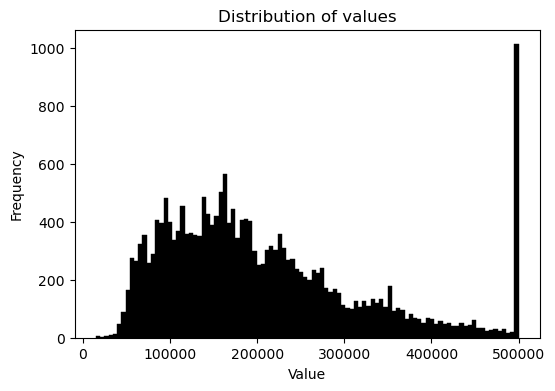

In [375]:
from matplotlib import pyplot as plt
#lib on top of plot lib
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=100, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Distribution of values')

plt.show()

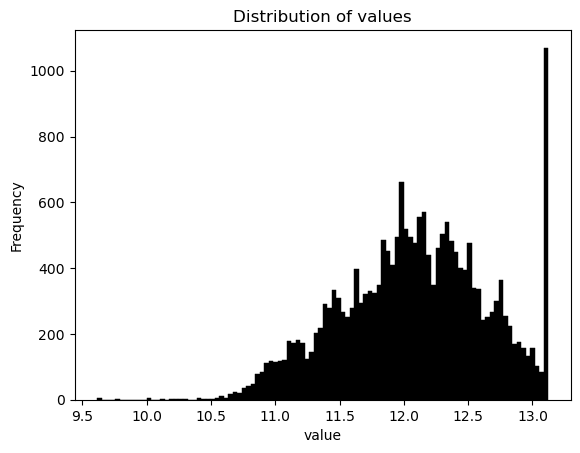

In [376]:
import numpy as np
median_house_value_log = np.log1p(df.median_house_value)
sns.histplot(median_house_value_log, bins=100, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('value')
plt.title('Distribution of values')

plt.show()

#### Does it have a long tail? Doesn't look like that

# Question 1 : Find a feature with missing values. How many missing values does it have?

In [377]:
df.isnull().sum()[df.isnull().sum()>0]

total_bedrooms    207
dtype: int64

In [378]:
df.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-124.3500,-122.2900,-121.8000,-118.4900,-118.01000,-117.25000,-117.080000,-116.29000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,32.5400,33.6300,33.9300,34.2600,37.71000,38.48000,38.960000,40.62610,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,1.0000,13.0000,18.0000,29.0000,37.00000,46.00000,52.000000,52.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,2.0000,941.0000,1447.7500,2127.0000,3148.00000,4651.50000,6213.200000,11212.11000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,1.0000,198.0000,296.0000,435.0000,647.00000,965.00000,1275.400000,2221.36000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,3.0000,510.0000,787.0000,1166.0000,1725.00000,2566.00000,3288.000000,5805.83000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,1.0000,184.0000,280.0000,409.0000,605.00000,890.00000,1162.000000,1982.66000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,0.4999,1.9038,2.5634,3.5348,4.74325,6.15921,7.300305,10.59654,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,14999.0000,82300.0000,119600.0000,179700.0000,264725.00000,376600.00000,489810.000000,500001.00000,500001.0000


# Question 2 : What's the median (50% percentile) for variable 'population'?

In [379]:
np.median(df['population'])

1166.0

In [380]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

print(df_train.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.01     36.06                25.0       1505.0             NaN   
1    -119.46     35.14                30.0       2943.0             NaN   
2    -122.44     37.80                52.0       3830.0             NaN   
3    -118.72     34.28                17.0       3051.0             NaN   
4    -121.93     36.62                34.0       2351.0             NaN   

   population  households  median_income  
0      1392.0       359.0         1.6812  
1      1565.0       584.0         2.5313  
2      1310.0       963.0         3.4801  
3      1705.0       495.0         5.7376  
4      1063.0       428.0         3.7250  


### Missing value

In [381]:
check = ['latitude',
         'longitude',
         'housing_median_age',
         'total_rooms',
         'total_bedrooms',
         'population',
         'households',
         'median_income'
         ]


def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]


def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X


def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# Question 3 : Which option gives better RMSE?

In [382]:
mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

print(np.round(rmse(y_val, y_mean_pred_val),8))
print(np.round(rmse(y_val, y_mean_pred_val),2))

0.32901954
0.33


In [383]:
X_null_train = prepare_X(df_train, fillna_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

X_null_val = prepare_X(df_val, fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

print(np.round(rmse(y_val, y_null_pred_val),8))
print(np.round(rmse(y_val, y_mean_pred_val),2))

0.32953304
0.33


# Question 4 : Which r gives the best RMSE?

In [384]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [385]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val), 2)
    print(r, w_0, rmse_val)

0 -11.686975241911805 0.33
1e-06 -11.686959176106466 0.33
0.0001 -11.685368865381463 0.33
0.001 -11.670931318209552 0.33
0.01 -11.528493585718884 0.33
0.1 -10.274500282155724 0.33
1 -4.920480897785023 0.33
5 -1.482095745620537 0.34
10 -0.7899311832204973 0.34


# Question 5: What's the standard deviation of all the scores?

In [386]:
rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)

    X_null_val = prepare_X(df_val, fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)

    rmse_list.append(rmse_val)

    print(r, w_0, rmse_val)

0 -11.900382138250365 0.34
1 -11.732757373224729 0.34
2 -11.806729360929001 0.33
3 -11.587900347706451 0.34
4 -11.389470588473802 0.34
5 -11.447114275993977 0.34
6 -11.370516351690588 0.35
7 -12.473448918447504 0.34
8 -11.80028742930196 0.35
9 -11.45904683062324 0.34


In [387]:
print(rmse_list)
np.round(np.std(rmse_list),3)

[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]


0.005

# Question 6: What's the RMSE on the test dataset?

In [388]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['median_house_value']
del df_test['median_house_value']

In [389]:
X_null_train_val = prepare_X(df_train_val, fillna_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.35